1. Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

2. Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

3. Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import jarque_bera

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("C:/Users/Ahmet/Desktop/data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


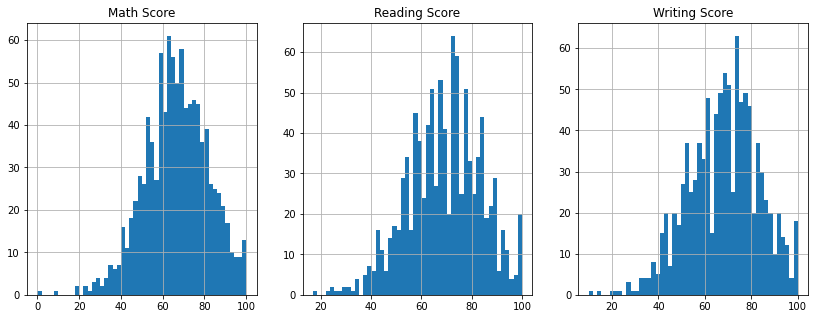

In [8]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
df["math score"].hist(bins=50)
plt.title("Math Score");

plt.subplot(1,3,2)
df["reading score"].hist(bins=50)
plt.title("Reading Score");

plt.subplot(1,3,3)
df["writing score"].hist(bins=50)
plt.title("Writing Score");

We can tell by looking at the histograms that the data is left skewed for the three exams. So they don't have normal distribution. We can approximate the normal distribution by taking the square root or logarithm of the data.

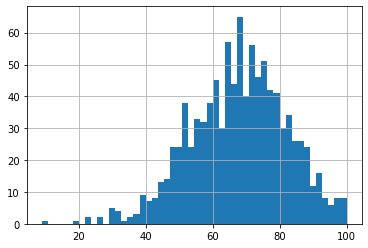

In [9]:
df["mean_score"] = (df["math score"] + df["reading score"] + df["writing score"])/3
df.mean_score.hist(bins=50);

In [10]:
pd.options.display.float_format = '{:.5f}'.format

dagilim_testleri = pd.DataFrame(columns=['feature', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

jb_stats = jarque_bera(df["mean_score"])
norm_stats = normaltest(df["mean_score"])
dagilim_testleri = dagilim_testleri.append({"feature": "mean_score",
                                            "jarque_bera_stats" : jb_stats[0] ,
                                            "jarque_bera_p_value" : jb_stats[1] ,
                                            "normal_stats": norm_stats[0] , 
                                            "normal_p_value" : norm_stats[1]
                                            }, ignore_index=True)
dagilim_testleri

,feature,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,mean_score,15.45339,0.00044,15.18672,0.00050


When we check the normal_p_value it's different from "0" so we can say that the distribution is normal.

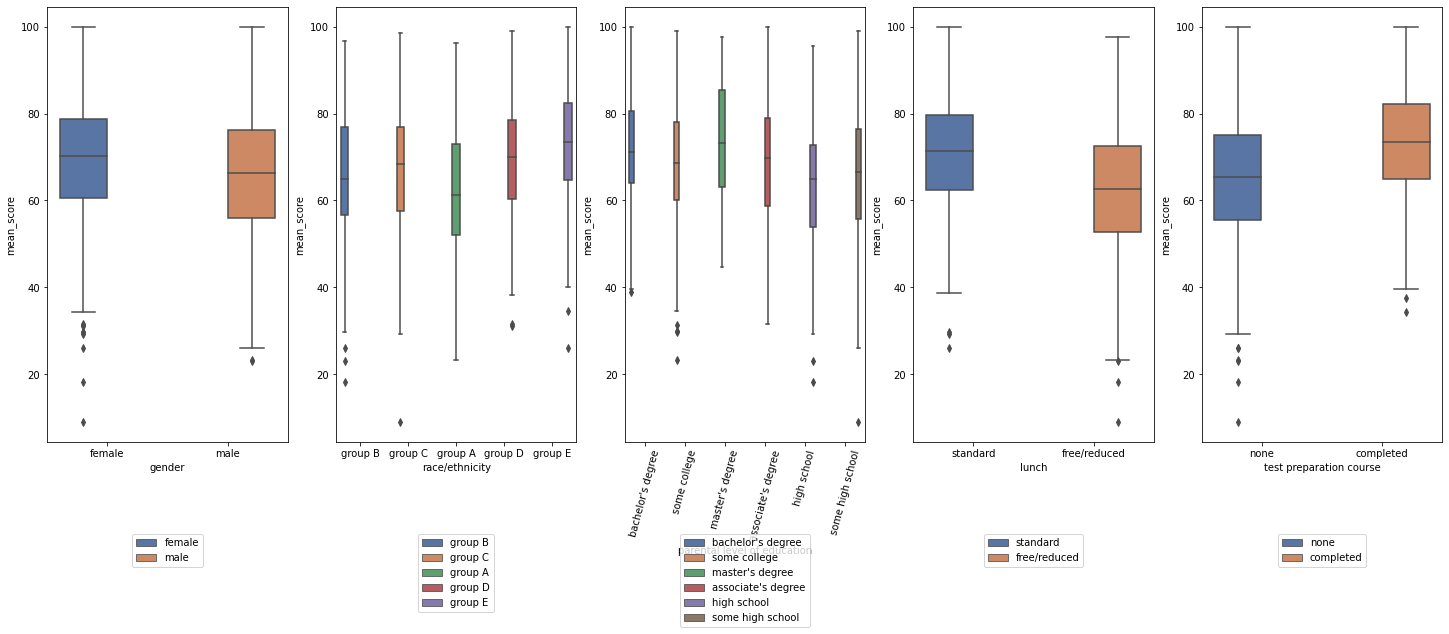

In [24]:
plt.figure(figsize=(25,8))
plt.subplot(1,5,1)
sns.boxplot(x="gender",y="mean_score",hue="gender",data=df,palette="deep")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2));
plt.subplot(1,5,2)
sns.boxplot(x="race/ethnicity",y="mean_score",hue="race/ethnicity",data=df,palette="deep")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2));
plt.subplot(1,5,3)
sns.boxplot(x="parental level of education",y="mean_score",hue="parental level of education",data=df,palette="deep")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2))
plt.xticks(rotation="75");
plt.subplot(1,5,4)
sns.boxplot(x="lunch",y="mean_score",hue="lunch",data=df,palette="deep")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2));
plt.subplot(1,5,5)
sns.boxplot(x="test preparation course",y="mean_score",hue="test preparation course",data=df,palette="deep")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2));


In the box plots we drew for 5 variables and our target variable, it can be said that ethnicity, family education status, nutritional status, and whether or not to go to the preparatory course affect the target variable noticeably. For the gender variable, although women seem to be more successful, it seems difficult to decide directly from the graph whether the difference is significant or not. For this, we should interpret the p values by determining a certain confidence interval with hypothesis testing.